<a href="https://colab.research.google.com/github/Diacod-I/Scratch-ML/blob/main/MLScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Link to arrhythmia dataset from UCI - https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/

Link for learning LDA - https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/ <br>
Link for vector transposing - http://mitran-lab.amath.unc.edu/courses/MATH547/lessons/Lesson03.pdf

## Monovariate Linear Regression from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def lmean(xarr):
  return sum(xarr)/len(xarr)

def stanerr(yarr,ypred):
    ydiff = list(map(lambda a:round(a,5),[(i-j)**2 for i,j in zip(yarr,ypred)]))
    err = (sum(ydiff)/(len(ydiff)-2))**(1/2)
    print("Standard Error of Estimates: {:.4f}".format(err),end='\n\n')

def rsquare(yarr,ypred):

    rss = sum([(i-j)**2 for i,j in zip(yarr,ypred)])
    ssr = sum([(i-lmean(yarr))**2 for i in yarr])
    tss = rss+ssr
    rsq = (1-(rss/tss))*100
    print("R^2: {:.4f} %".format(rsq),end='\n\n')

In [ ]:
def LinearReg(xarr,yarr,err_est='standard'):
    xmean = lmean(xarr)
    ymean = lmean(yarr)

    xvar = list(map(lambda a: round(a,4),[(i-xmean) for i in xarr]))
    yvar = list(map(lambda a: round(a,4),[(i-ymean) for i in yarr]))

    xsvar = list(map(lambda a: round(a,4),[i**2 for i in xvar]))
    varprod = list(map(lambda a: round(a,4),[i*j for i,j in zip(xvar,yvar)]))

    covar = sum(varprod)/len(varprod)
    b1 = sum(varprod)/sum(xsvar)
    b0 = ymean - (b1*xmean)

    ypred = [((b1*i)+b0) for i in xarr]

    print("X values provided:",xarr,end='\n')
    print("Y values provided:",yarr,end='\n\n')

    print("Mean of X:",xmean,end='\n')
    print("Mean of Y:",ymean,end='\n\n')

    print("Variance of X (X-Xmean):",xvar,end='\n')
    print("Variance of Y (Y-Ymean):",yvar,end='\n\n')

    print("Squared X Variance",xsvar,end='\n')
    print("(X-Xmean)(Y-Ymean):",varprod,end='\n\n')

    print("Covariance:{:.4f}".format(covar),end='\n')
    print("b1 = Σ((X-Xmean)(Y-Ymean))/Σ((X-Xmean)^2) : {:.4f}".format(b1),end='\n')
    print("b0 = Ymean - (b1)(Xmean) : {:.4f}".format(b0),end='\n\n')

    print("Predictions of Y based on the Linear Equation:",list(map(lambda a:float("{:.3f}".format(a)),ypred)),end='\n\n')

    if err_est=='standard':
      stanerr(yarr,ypred)

    elif err_est=='rsquare':
      rsquare(yarr,ypred)
    else:
      raise Exception('Invalid Argument: err_est\n\nOnly arguments possible are as follows:\n\n\'standard(default)\', \'rsquare\'\n')

    plt.scatter(xarr,yarr)
    plt.plot(xarr,ypred,c='k')

In [ ]:
xarr = list(np.random.randint(11, size=20))
yarr = list(np.random.randint(11, size=20))

X values provided: [10, 5, 3, 0, 4, 0, 6, 7, 3, 4, 0, 6, 7, 2, 1, 8, 8, 3, 8, 3]
Y values provided: [9, 6, 1, 6, 5, 5, 8, 8, 2, 6, 7, 6, 5, 10, 1, 1, 5, 3, 5, 9]

Mean of X: 4.4
Mean of Y: 5.4

Variance of X (X-Xmean): [5.6, 0.6, -1.4, -4.4, -0.4, -4.4, 1.6, 2.6, -1.4, -0.4, -4.4, 1.6, 2.6, -2.4, -3.4, 3.6, 3.6, -1.4, 3.6, -1.4]
Variance of Y (Y-Ymean): [3.6, 0.6, -4.4, 0.6, -0.4, -0.4, 2.6, 2.6, -3.4, 0.6, 1.6, 0.6, -0.4, 4.6, -4.4, -4.4, -0.4, -2.4, -0.4, 3.6]

Squared X Variance [31.36, 0.36, 1.96, 19.36, 0.16, 19.36, 2.56, 6.76, 1.96, 0.16, 19.36, 2.56, 6.76, 5.76, 11.56, 12.96, 12.96, 1.96, 12.96, 1.96]
(X-Xmean)(Y-Ymean): [20.16, 0.36, 6.16, -2.64, 0.16, 1.76, 4.16, 6.76, 4.76, -0.24, -7.04, 0.96, -1.04, -11.04, 14.96, -15.84, -1.44, 3.36, -1.44, -5.04]

Covariance:0.8900
b1 = Σ((X-Xmean)(Y-Ymean))/Σ((X-Xmean)^2) : 0.1030
b0 = Ymean - (b1)(Xmean) : 4.9468

Predictions of Y based on the Linear Equation: [5.977, 5.462, 5.256, 4.947, 5.359, 4.947, 5.565, 5.668, 5.256, 5.359, 4.947, 

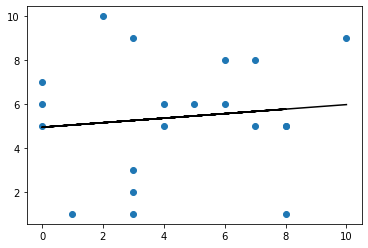

In [ ]:
LinearReg(xarr,yarr,err_est='rsquare')

## Logistic Regression from scratch

## LDA on Iris dataset

In [ ]:
data = pd.read_csv("iris.data")
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
(data[data=='None']==False)

,5.1,3.5,1.4,0.2,Iris-setosa
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
sepallength = data.iloc[:,0]
classes = data.iloc[:,-1]
sepalwidth = data.iloc[:,1]
sepalwidth

0      3.0
1      3.2
2      3.1
3      3.6
4      3.9
5      3.4
6      3.4
7      2.9
8      3.1
9      3.7
10     3.4
11     3.0
12     3.0
13     4.0
14     4.4
15     3.9
16     3.5
17     3.8
18     3.8
19     3.4
20     3.7
21     3.6
22     3.3
23     3.4
24     3.0
25     3.4
26     3.5
27     3.4
28     3.2
29     3.1
30     3.4
31     4.1
32     4.2
33     3.1
34     3.2
35     3.5
36     3.1
37     3.0
38     3.4
39     3.5
40     2.3
41     3.2
42     3.5
43     3.8
44     3.0
45     3.8
46     3.2
47     3.7
48     3.3
49     3.2
50     3.2
51     3.1
52     2.3
53     2.8
54     2.8
55     3.3
56     2.4
57     2.9
58     2.7
59     2.0
60     3.0
61     2.2
62     2.9
63     2.9
64     3.1
65     3.0
66     2.7
67     2.2
68     2.5
69     3.2
70     2.8
71     2.5
72     2.8
73     2.9
74     3.0
75     2.8
76     3.0
77     2.9
78     2.6
79     2.4
80     2.4
81     2.7
82     2.7
83     3.0
84     3.4
85     3.1
86     2.3
87     3.0
88     2.5
89     2.6
90     3.0

In [ ]:
classes

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
5          Iris-setosa
6          Iris-setosa
7          Iris-setosa
8          Iris-setosa
9          Iris-setosa
10         Iris-setosa
11         Iris-setosa
12         Iris-setosa
13         Iris-setosa
14         Iris-setosa
15         Iris-setosa
16         Iris-setosa
17         Iris-setosa
18         Iris-setosa
19         Iris-setosa
20         Iris-setosa
21         Iris-setosa
22         Iris-setosa
23         Iris-setosa
24         Iris-setosa
25         Iris-setosa
26         Iris-setosa
27         Iris-setosa
28         Iris-setosa
29         Iris-setosa
30         Iris-setosa
31         Iris-setosa
32         Iris-setosa
33         Iris-setosa
34         Iris-setosa
35         Iris-setosa
36         Iris-setosa
37         Iris-setosa
38         Iris-setosa
39         Iris-setosa
40         Iris-setosa
41         Iris-setosa
42         Iris-setosa
43         

In [ ]:
classcode = {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}

In [ ]:
classes = classes.replace(classcode)
classes

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [ ]:
n1 = classes[classes==1].count()
n2 = classes[classes==2].count()
n3 = classes[classes==3].count()
print(n1,n2,n3)

49 50 50


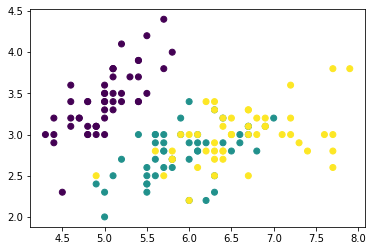

In [ ]:
plt.scatter(sepallength,sepalwidth,c=classes)

ValueError: ignored

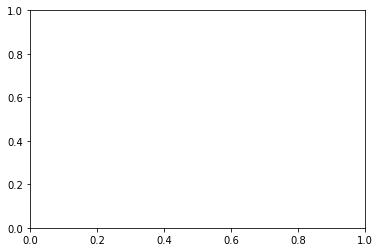

In [ ]:
plt.scatter(sepallength,0,c=classes)